<a href="https://colab.research.google.com/github/kaurneetlove/ML-Project/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/new dataset.csv")


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [99]:
df=df.drop('key', axis=1)

In [5]:
df.shape

(21326, 8)

In [9]:
df.isna().any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,21326.000000,21326.000000,21326.000000,21326.000000,21326.000000,21326.000000
mean,11.337400,-72.486469,39.923332,-72.500345,39.914392,1.658351
std,9.623444,10.502317,6.648255,10.453169,6.147388,1.282340
min,-3.000000,-74.689831,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992144,40.734734,-73.991182,40.734466,1.000000
50%,8.500000,-73.981686,40.752777,-73.980157,40.753600,1.000000
75%,12.500000,-73.966846,40.767494,-73.963627,40.768207,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [11]:
df.drop(df[df['passenger_count']<1].index,axis=0,inplace=True)
df.drop(df[df['fare_amount']<1].index,axis=0,inplace=True)
df.drop(df[df['pickup_latitude']<40].index,axis=0,inplace=True)
df.drop(df[df['dropoff_latitude']<40].index,axis=0,inplace=True)
df.drop(df[df['pickup_longitude']>-70].index,axis=0,inplace=True)
df.drop(df[df['dropoff_longitude']>-70].index,axis=0,inplace=True)
df.drop(df[df['pickup_latitude']>45].index,axis=0,inplace=True)
df.drop(df[df['dropoff_latitude']>45].index,axis=0,inplace=True)
df.drop(df[df['pickup_longitude']<-79].index,axis=0,inplace=True)
df.drop(df[df['dropoff_longitude']<-79].index,axis=0,inplace=True)

In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000
mean,11.332477,-73.974787,40.751259,-73.973905,40.751646,1.666010
std,9.579739,0.041992,0.032174,0.039937,0.034052,1.281613
min,2.500000,-74.689831,40.121653,-74.689831,40.164927,1.000000
25%,6.000000,-73.992401,40.736455,-73.991382,40.736168,1.000000
50%,8.500000,-73.982045,40.753527,-73.980541,40.754283,1.000000
75%,12.500000,-73.968137,40.767887,-73.965367,40.768603,2.000000
max,180.000000,-72.856968,41.366138,-72.854940,41.366138,6.000000


In [101]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [102]:
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [103]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [13]:
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['pickup_datetime'].dt.dayofweek

In [62]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_date,pickup_month,pickup_day,distance
0,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,0,0.708412
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2.246029
2,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,3,0.871095
3,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,5,1.334809
4,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,1,1.098331


In [15]:
def haversineDistanceInKM(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    km = 6371* c
    return km

df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversineDistanceInKM,axis=1)



In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_date,pickup_month,pickup_day,distance
count,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000,20797.000000
mean,11.332477,-73.974787,40.751259,-73.973905,40.751646,1.666010,13.482618,15.675674,6.258162,3.031639,3.373261
std,9.579739,0.041992,0.032174,0.039937,0.034052,1.281613,6.517354,8.679443,3.446043,1.966873,4.042491
min,2.500000,-74.689831,40.121653,-74.689831,40.164927,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992401,40.736455,-73.991382,40.736168,1.000000,9.000000,8.000000,3.000000,1.000000,1.263675
50%,8.500000,-73.982045,40.753527,-73.980541,40.754283,1.000000,14.000000,16.000000,6.000000,3.000000,2.178282
75%,12.500000,-73.968137,40.767887,-73.965367,40.768603,2.000000,19.000000,23.000000,9.000000,5.000000,3.911811
max,180.000000,-72.856968,41.366138,-72.854940,41.366138,6.000000,23.000000,31.000000,12.000000,6.000000,101.094619


In [17]:
df.drop(df[df['distance']<1].index,axis=0,inplace=True)

In [18]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_date,pickup_month,pickup_day,distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,0,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,3,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,5,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,1,1.999157


<Axes: xlabel='passenger_count', ylabel='count'>

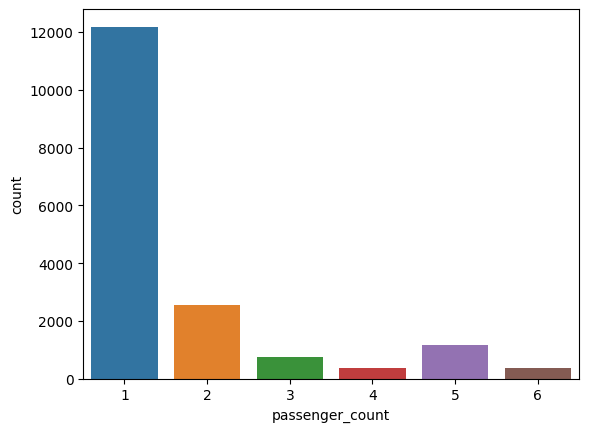

In [19]:
sns.countplot(x="passenger_count", data=df)



<Axes: xlabel='passenger_count', ylabel='fare_amount'>

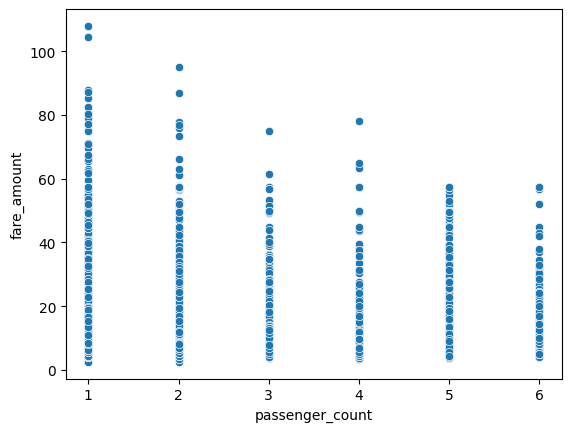

In [20]:
sns.scatterplot(x=df['passenger_count'], y=df['fare_amount'])

<Axes: xlabel='pickup_day', ylabel='fare_amount'>

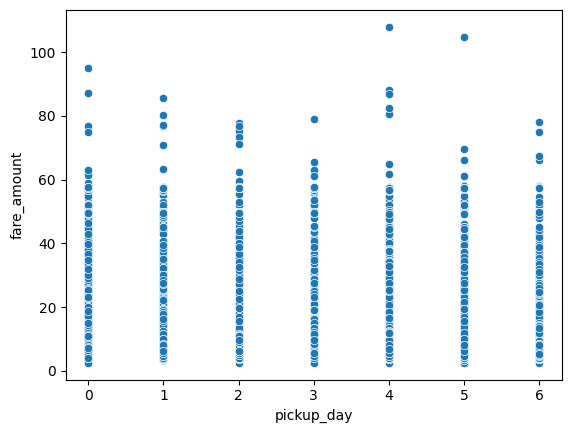

In [21]:
sns.scatterplot(y=df['fare_amount'],x=df['pickup_day'])

<Axes: xlabel='pickup_hour', ylabel='fare_amount'>

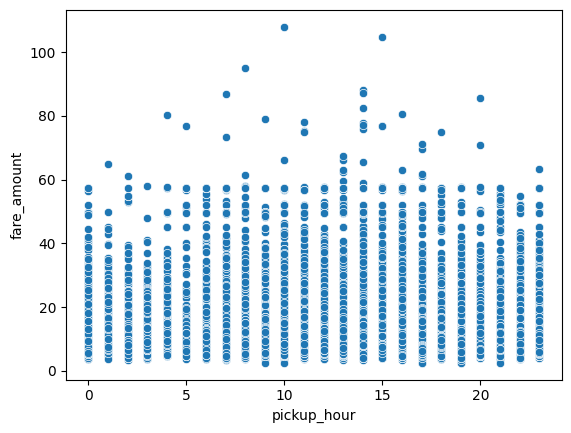

In [22]:
sns.scatterplot(x=df['pickup_hour'],y=df['fare_amount'])

<Axes: xlabel='fare_amount', ylabel='distance'>

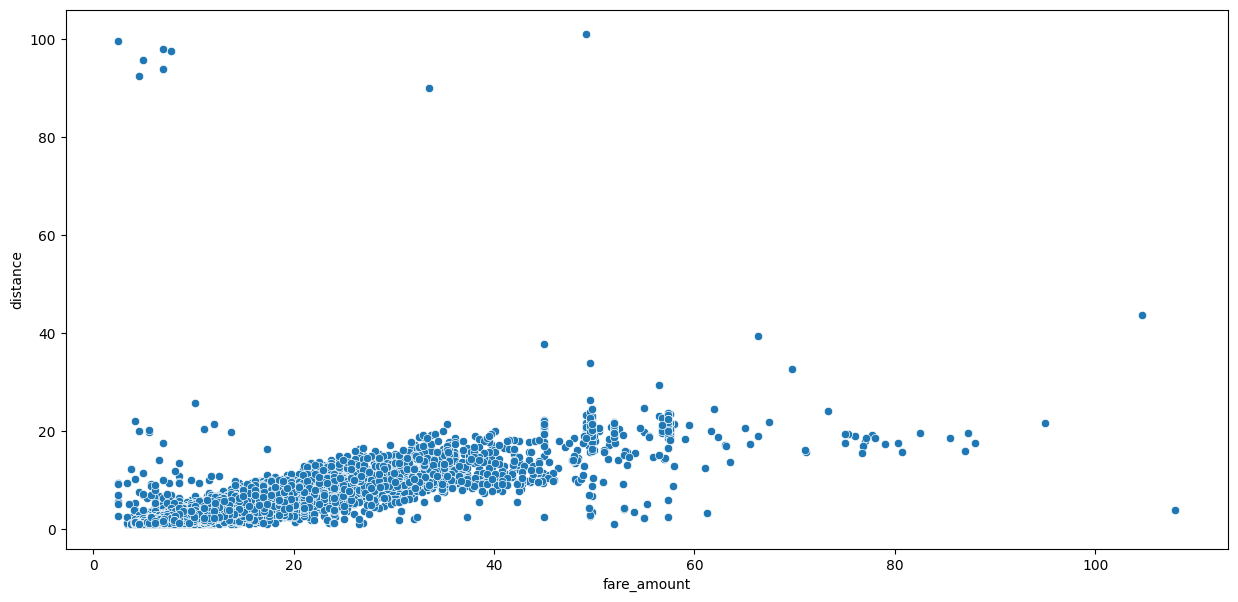

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['fare_amount'],y=df['distance'])

<ipython-input-24-84fbef3fe751>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'],bins='auto',color='green')


<Axes: xlabel='distance', ylabel='Density'>

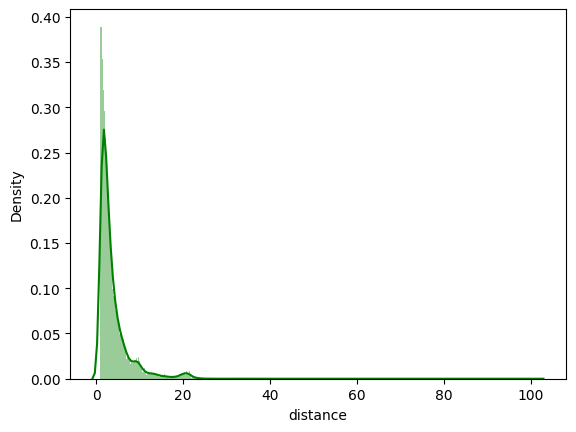

In [24]:
sns.distplot(df['distance'],bins='auto',color='green')

In [25]:
df['distance'] = np.log1p(df['distance'])

<ipython-input-26-84fbef3fe751>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'],bins='auto',color='green')


<Axes: xlabel='distance', ylabel='Density'>

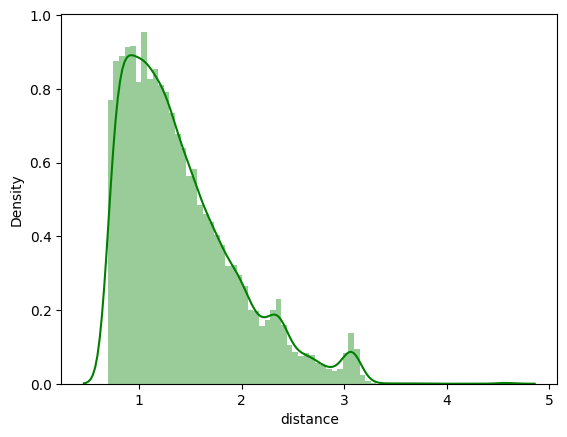

In [26]:
sns.distplot(df['distance'],bins='auto',color='green')

<ipython-input-27-d1f939ca3158>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'],bins='auto',color='green')


<Axes: xlabel='fare_amount', ylabel='Density'>

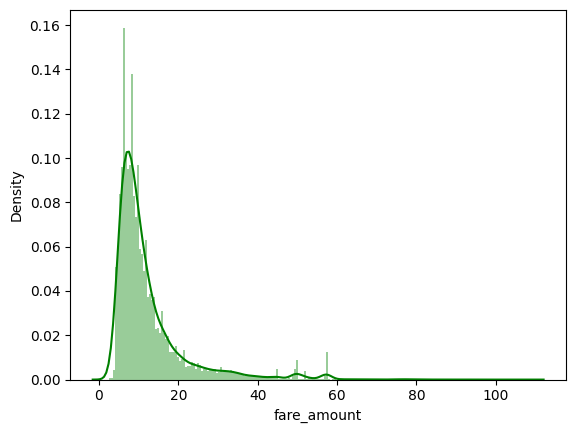

In [27]:
sns.distplot(df['fare_amount'],bins='auto',color='green')

In [28]:
df['fare_amount'] = np.log1p(df['fare_amount'])

<ipython-input-29-d1f939ca3158>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'],bins='auto',color='green')


<Axes: xlabel='fare_amount', ylabel='Density'>

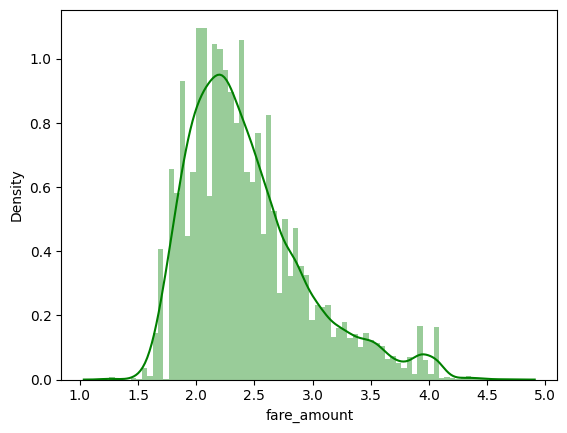

In [29]:
sns.distplot(df['fare_amount'],bins='auto',color='green')

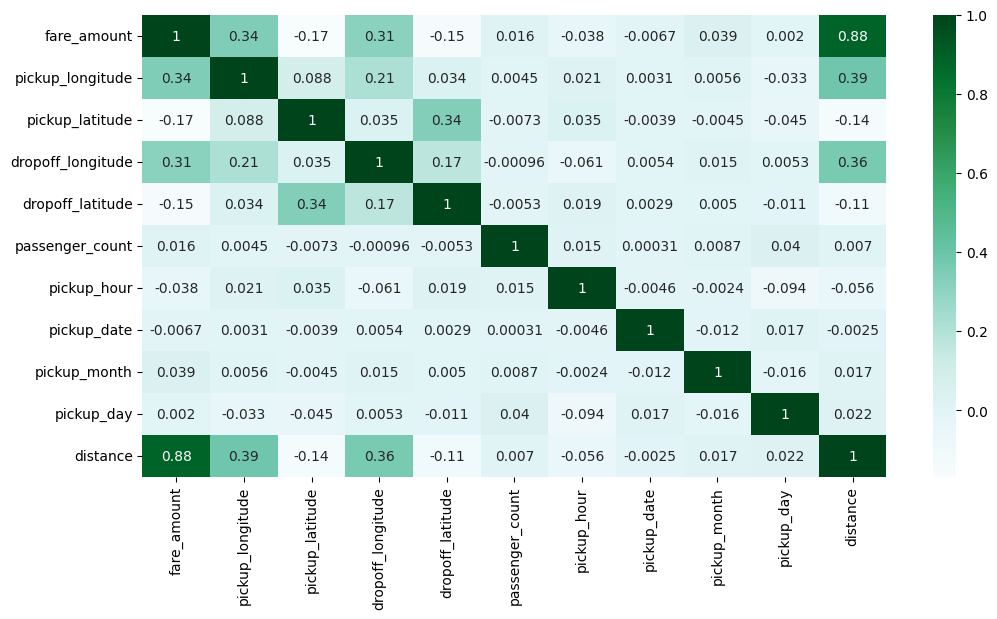

In [30]:
plt.figure(figsize = (12,6))
sns.heatmap(df.drop(['key', 'pickup_datetime'], axis = 1).corr(), cmap ='BuGn', annot = True);

In [64]:
x=df.drop(['fare_amount','pickup_datetime'],axis=1)
y=df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [82]:
dtt = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)
y_pred = dtt.predict(x_test)

In [83]:
RMSE_test_dt= np.sqrt(mean_squared_error(y_test,y_pred))

In [84]:
print("Root Mean Squared Error for Test data = ",RMSE_test_dt)

Root Mean Squared Error for Test data =  7.3460608853681135


In [86]:
r2_score(y_test, y_pred)

0.41688403514285155

In [87]:
A=x_train.T.dot(x_train)
B=np.linalg.inv(A)
C=B.dot(x_train.T)
beta=C.dot(y_train)
print(beta)


[-0.09342133 -0.02938549 -0.20418227 -0.24671276  0.33502177]


In [90]:
y_predict=x_test.dot(beta)

In [92]:
RMSE_test_dt_lr= np.sqrt(mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error for Test data = ",RMSE_test_dt_lr)

Root Mean Squared Error for Test data =  9.749407351601134


In [93]:
r2_score(y_test, y_predict)

-0.02707537781942304